To be removed # Cancer seacells plots

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Metacells_hdg_new/atlas_cancer_seacells_hdg_patients.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 8735 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells'
    layers: 'raw'

In [4]:
sc.settings.set_figure_params(dpi_save=300, frameon=False, format='png')
sc.settings.figdir = "figures/"

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [6]:
sc.pp.log1p(adata)

In [18]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/Atlas_scripts/HVG/atlas_cancer_hdg_dispersion_patients.csv',  index_col=0)

In [19]:
adata.var['highly_variable']=hvg.highly_variable

In [20]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)
adata.var

,highly_variable
FAM87B,True
LINC00115,False
FAM41C,False
SAMD11,True
NOC2L,False
...,...
MT-ND4L,True
MT-ND4,False
MT-ND5,True
MT-ND6,True


In [21]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [22]:
sc.tl.pca(adata, use_highly_variable=True)

In [23]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


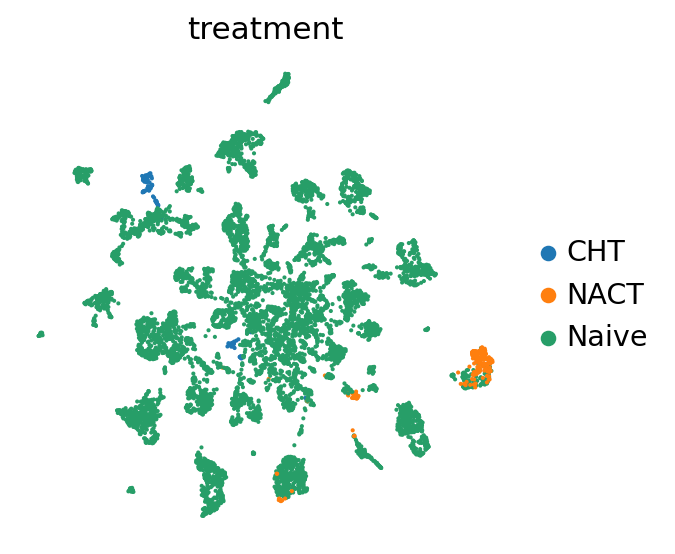

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


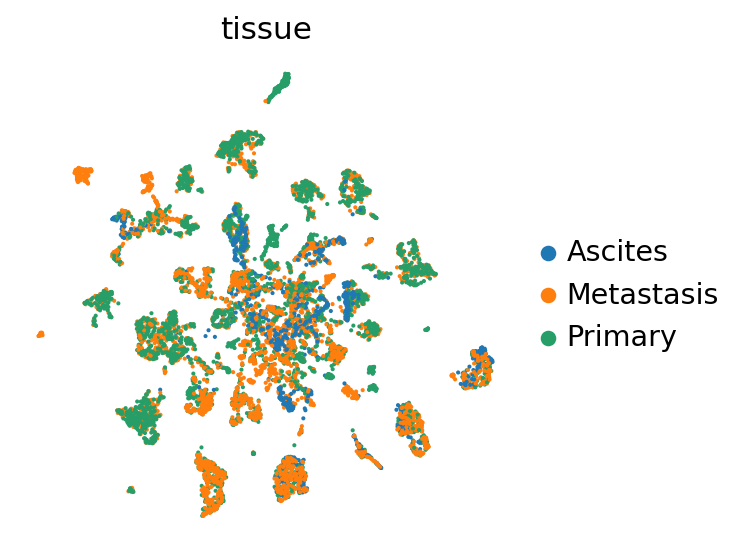

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


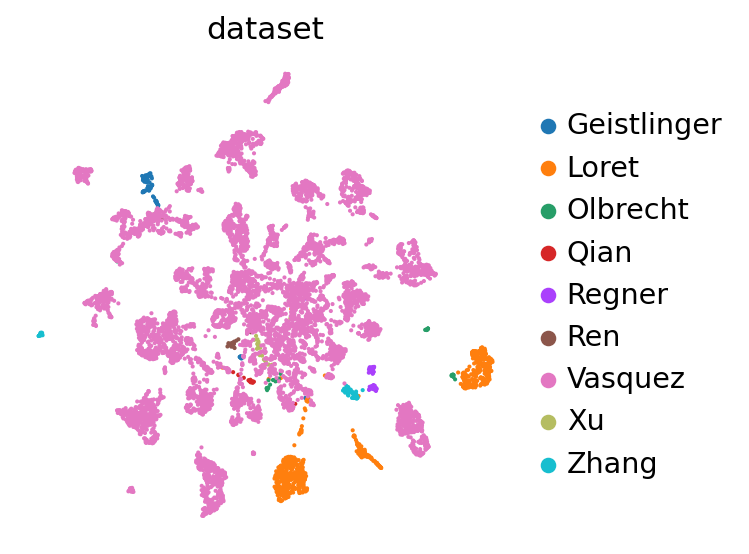

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


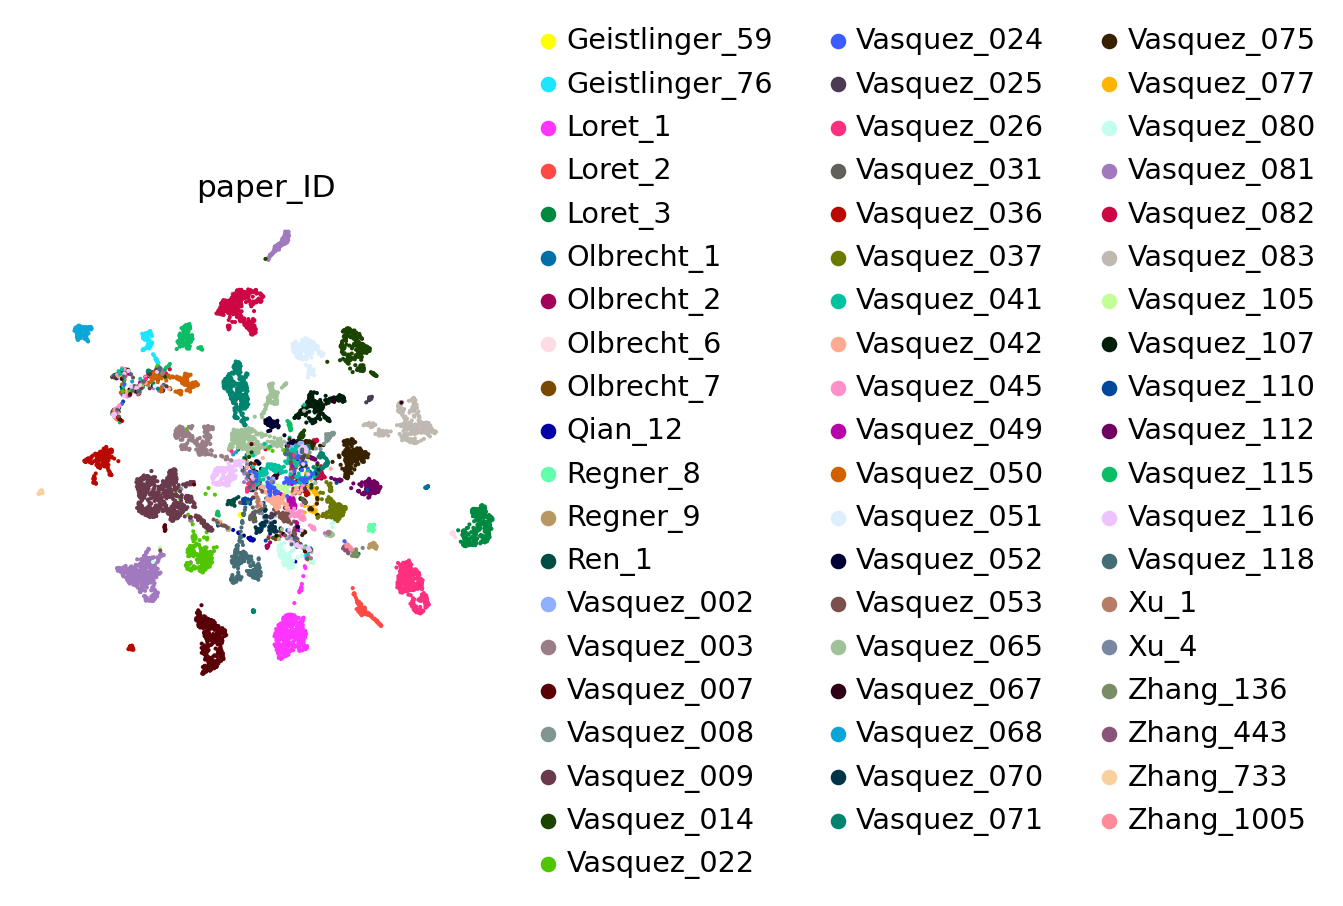

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


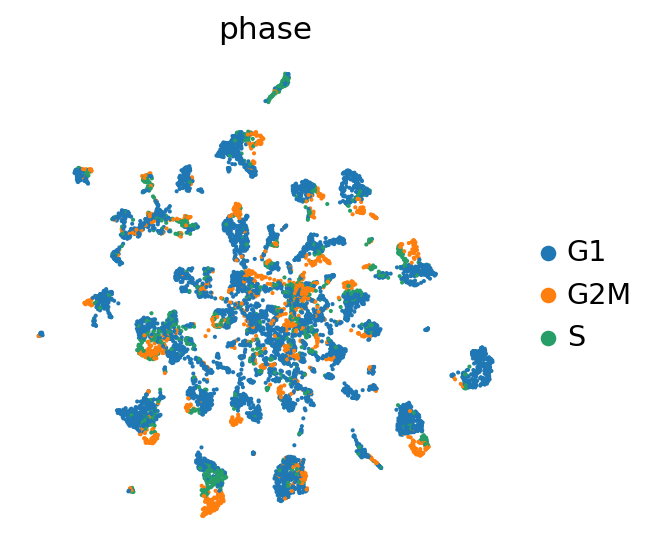

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


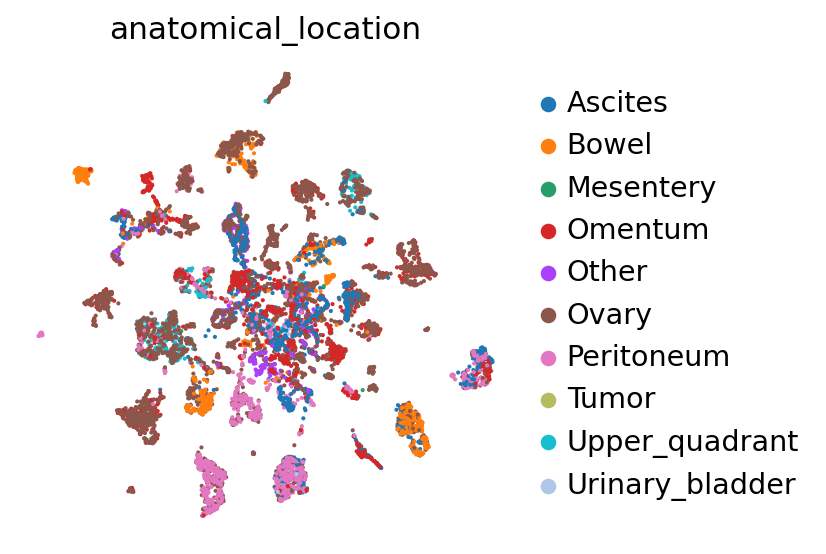

In [27]:
sc.pl.umap(adata, color=["treatment"], frameon=False, save='cancer_seacells_HDG_treatm.png')
sc.pl.umap(adata, color=["tissue"], frameon=False, save='cancer_seacells_HDG_tissue.png')
sc.pl.umap(adata, color=["dataset"], frameon=False, save='cancer_seacells_HDG_dataset.png')
sc.pl.umap(adata, color=["paper_ID"], frameon=False, save='cancer_seacells_HDG_patients.png')
sc.pl.umap(adata, color=["phase"], frameon=False, save='cancer_seacells_HDG_cellcycle.png')
sc.pl.umap(adata, color=["anatomical_location"], frameon=False, save='cancer_seacells_HDG_anatomy.png')